In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
# Load the data
data = pd.read_csv(r"letter-recognition.data", header=None)

In [3]:
# Preprocess the data
X = data.iloc[:, 1:]
y = data.iloc[:, 0]


In [4]:
# Convert labels to numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [5]:
# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [6]:
data.head(5)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import History
# Build the DNN Model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(np.unique(y)), activation='softmax'))  # Output layer with softmax for multiclass classification

2024-04-22 21:54:44.015593: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-22 21:54:44.264857: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-12.4/lib64
2024-04-22 21:54:44.264887: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-04-22 21:54:44.299905: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-22 21:54:44.796

In [9]:
# Compile the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Train the Model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
400/400 [==============================] - 2s 3ms/step - loss: 1.5850 - accuracy: 0.5713 - val_loss: 0.9248 - val_accuracy: 0.7375
Epoch 2/10
400/400 [==============================] - 1s 2ms/step - loss: 0.7397 - accuracy: 0.7884 - val_loss: 0.6640 - val_accuracy: 0.8075
Epoch 3/10
400/400 [==============================] - 1s 2ms/step - loss: 0.5509 - accuracy: 0.8398 - val_loss: 0.5061 - val_accuracy: 0.8587
Epoch 4/10
400/400 [==============================] - 1s 2ms/step - loss: 0.4446 - accuracy: 0.8718 - val_loss: 0.4351 - val_accuracy: 0.8725
Epoch 5/10
400/400 [==============================] - 1s 2ms/step - loss: 0.3732 - accuracy: 0.8899 - val_loss: 0.3685 - val_accuracy: 0.8913
Epoch 6/10
400/400 [==============================] - 1s 2ms/step - loss: 0.3210 - accuracy: 0.9056 - val_loss: 0.3402 - val_accuracy: 0.9016
Epoch 7/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2803 - accuracy: 0.9162 - val_loss: 0.2983 - val_accuracy: 0.9150
Epoch 

In [11]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

125/125 [==============================] - 0s 2ms/step - loss: 0.2221 - accuracy: 0.9323
Test Loss: 0.2221, Test Accuracy: 0.9323


In [12]:
# Plot training history
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

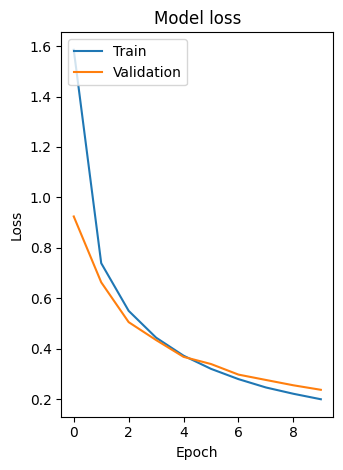

In [15]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

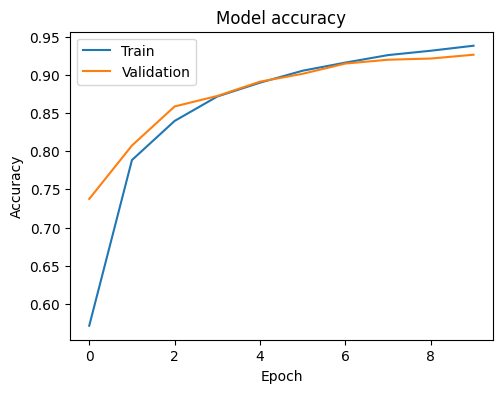

In [16]:
# Plot the history
plot_history(history)

In [17]:
# Given data
import numpy as np
new_data = np.array([12,14,12,8,5,9,10,4,3,5,10,7,10,12,2,6]).reshape(1, -1)


In [18]:
# Use the model to make predictions
predictions = model.predict(new_data)
print(predictions)
# Display the predictions
predicted_class = np.argmax(predictions)
print(f'The predicted class is: {predicted_class}')

1/1 [==============================] - 0s 135ms/step
[[1.6129061e-25 0.0000000e+00 1.8577513e-13 0.0000000e+00 2.6483112e-16
  3.1403322e-31 1.1048511e-26 1.0000000e+00 0.0000000e+00 0.0000000e+00
  6.4151974e-29 0.0000000e+00 1.4975821e-20 3.6556003e-31 6.4058735e-16
  4.8900581e-37 4.3979157e-11 0.0000000e+00 1.2101517e-31 8.2065355e-15
  5.9975134e-35 6.7807080e-15 7.3063650e-24 6.7222349e-33 3.2366397e-34
  3.7306321e-38]]
The predicted class is: 7


In [19]:
class_mapping = {
    0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J',
    10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T',
    20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'
}

In [20]:
# Display the predicted class using the mapping
predicted_letter = class_mapping[predicted_class]
print(f'The predicted class is: {predicted_class}, which corresponds to the letter: {predicted_letter}')

The predicted class is: 7, which corresponds to the letter: H


In [21]:
import tkinter as tk
from tkinter import messagebox
import numpy as np

# Function to predict letter
def predict_letter():
    # Retrieve input data from entry widget
    input_data = entry.get()
    # Convert input data to numpy array
    try:
        new_data = np.array(list(map(int, input_data.split()))).reshape(1, -1)
        # Use the model to make predictions
        predictions = model.predict(new_data)
        # Display the predictions
        predicted_class = np.argmax(predictions)
        predicted_letter = class_mapping.get(predicted_class, 'Unknown')
        # Display predicted Letter
        messagebox.showinfo("Prediction Result", f"The predicted letter is: {predicted_letter}")
    except ValueError:
        messagebox.showerror("Error", "Invalid input data. Please enter space-separated integers.")

In [22]:
# Load your model and class mapping before creating the Tkinter window

# Create Tkinter window
window = tk.Tk()
window.title("Letter Prediction")

# Create a Label
label = tk.Label(window, text="Enter new data (space-separated integers):")
label.pack(pady=10)

# Create an entry widget
entry = tk.Entry(window, width=50)
entry.pack()

# Create a button
button = tk.Button(window, text="Predict Letter", command=predict_letter)
button.pack(pady=10)

# Run the Tkinter event Loop
window.mainloop()


1/1 [==============================] - 0s 31ms/step
